In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests

In [39]:
df = pd.read_json('gme.json')
df1 = pd.read_json('recentGME.json')
df2= pd.read_csv('AMC.csv')
wsb= pd.read_json('light_encode_wsb.json')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.406250,2.515000,2.381250,2.512500,1.691666,76216000
1,2002-02-14,2.543750,2.548750,2.481250,2.500000,1.683250,11021600
2,2002-02-15,2.500000,2.506250,2.462500,2.487500,1.674834,8389600
3,2002-02-19,2.475000,2.475000,2.343750,2.387500,1.607504,7410400
4,2002-02-20,2.400000,2.468750,2.381250,2.468750,1.662210,6892800
...,...,...,...,...,...,...,...
5595,2024-05-07,15.850000,17.290001,14.930000,16.309999,16.309999,24308600
5596,2024-05-08,16.049999,17.240000,15.330000,15.920000,15.920000,24775100
5597,2024-05-09,15.900000,18.510000,15.350000,18.010000,18.010000,25759300
5598,2024-05-10,17.930000,20.200001,16.879999,17.459999,17.459999,36831900


the varibles in this set are the dates the stock market was open the price there were at when it opened the highest the price went to lowest it went the price when it closed and the volume or the amount of stocks sold in a day and adj close witch is the adjusted price of the stock when the market closes 

In [4]:
df[df['High']==df['High'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


<AxesSubplot:xlabel='Low', ylabel='Volume'>

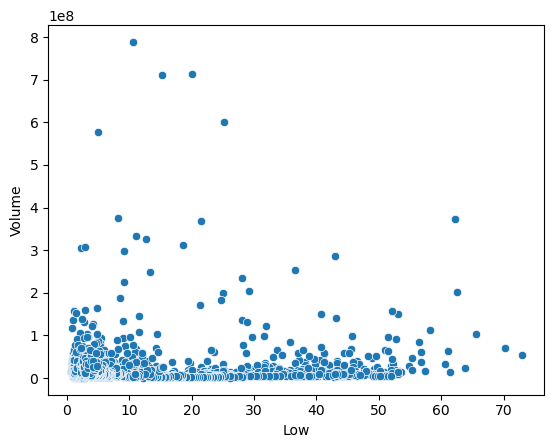

In [6]:
sns.scatterplot(data=df, x=df['Low'], y=df['Volume'], )

there is a very very weak correlation with .1

In [7]:
df['Low'].corr(df['Volume'])

0.10259646883179026

In [8]:
df['High'] = np.log(df['High']+1)

<AxesSubplot:xlabel='Date', ylabel='High'>

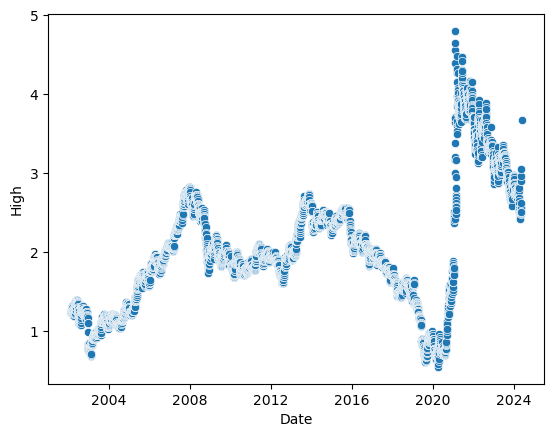

In [9]:
sns.scatterplot(data=df, x=df['Date'], y=df['High'], )

In [10]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.406250,1.257040,2.381250,2.512500,1.691666,76216000
1,2002-02-14,2.543750,1.266595,2.481250,2.500000,1.683250,11021600
2,2002-02-15,2.500000,1.254547,2.462500,2.487500,1.674834,8389600
3,2002-02-19,2.475000,1.245594,2.343750,2.387500,1.607504,7410400
4,2002-02-20,2.400000,1.243794,2.381250,2.468750,1.662210,6892800
...,...,...,...,...,...,...,...
5595,2024-05-07,15.850000,2.906355,14.930000,16.309999,16.309999,24308600
5596,2024-05-08,16.049999,2.903617,15.330000,15.920000,15.920000,24775100
5597,2024-05-09,15.900000,2.970927,15.350000,18.010000,18.010000,25759300
5598,2024-05-10,17.930000,3.054001,16.879999,17.459999,17.459999,36831900


In [11]:
del df['Adj Close']

In [12]:
df

,Date,Open,High,Low,Close,Volume
0,2002-02-13,2.406250,1.257040,2.381250,2.512500,76216000
1,2002-02-14,2.543750,1.266595,2.481250,2.500000,11021600
2,2002-02-15,2.500000,1.254547,2.462500,2.487500,8389600
3,2002-02-19,2.475000,1.245594,2.343750,2.387500,7410400
4,2002-02-20,2.400000,1.243794,2.381250,2.468750,6892800
...,...,...,...,...,...,...
5595,2024-05-07,15.850000,2.906355,14.930000,16.309999,24308600
5596,2024-05-08,16.049999,2.903617,15.330000,15.920000,24775100
5597,2024-05-09,15.900000,2.970927,15.350000,18.010000,25759300
5598,2024-05-10,17.930000,3.054001,16.879999,17.459999,36831900


In [13]:
res= pd.concat([df, df1])

In [14]:
res

,Date,Open,High,Low,Close,Volume
0,2002-02-13,2.40625,1.257040,2.38125,2.51250,76216000
1,2002-02-14,2.54375,1.266595,2.48125,2.50000,11021600
2,2002-02-15,2.50000,1.254547,2.46250,2.48750,8389600
3,2002-02-19,2.47500,1.245594,2.34375,2.38750,7410400
4,2002-02-20,2.40000,1.243794,2.38125,2.46875,6892800
...,...,...,...,...,...,...
89,2024-09-20,19.63000,22.030000,19.48200,21.85000,60804837
90,2024-09-23,21.54000,22.560000,21.23010,22.31000,13945783
91,2024-09-24,22.61000,22.720000,21.54000,22.63000,12112487
92,2024-09-25,22.16000,22.830000,22.06500,22.18000,6137420


In [20]:
url= 'https://api.polygon.io/v1/open-close/AMC/2024-09-06?adjusted=false&apiKey=zBHHoGHathPqB4pBkX82EBsD2Ys1avWW'

r = requests.get(url)
data = r.json()

print(data)

{'status': 'OK', 'from': '2024-09-06', 'symbol': 'AMC', 'open': 4.74, 'high': 4.98, 'low': 4.65, 'close': 4.98, 'volume': 12982881.0, 'afterHours': 4.9001, 'preMarket': 4.73}


{'status': 'OK',
 'from': '2024-09-06',
 'symbol': 'AMC',
 'open': 4.74,
 'high': 4.98,
 'low': 4.65,
 'close': 4.98,
 'volume': 12982881.0,
 'afterHours': 4.9001,
 'preMarket': 4.73}

In [30]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-18,19.180000,19.790001,18.900000,18.900000,13.593410,5457200
1,2013-12-19,18.900000,19.490000,18.809999,19.490000,14.017754,1605400
2,2013-12-20,19.650000,19.770000,19.400000,19.680000,14.154409,737100
3,2013-12-23,19.790001,19.990000,19.500000,19.740000,14.197562,698100
4,2013-12-24,19.740000,19.820000,19.500000,19.530001,14.046528,213700
...,...,...,...,...,...,...,...
2076,2022-03-18,14.980000,15.900000,14.970000,15.800000,15.800000,31890700
2077,2022-03-21,15.690000,16.549999,15.280000,15.860000,15.860000,34256700
2078,2022-03-22,15.880000,18.910000,15.750000,18.260000,18.260000,81798900
2079,2022-03-23,18.750000,22.350000,18.180000,20.740000,20.740000,170142600


In [31]:
del df2['Adj Close']

In [47]:
df2["Date"]= pd.to_datetime(df2['Date'])
wsb["Date"] = pd.to_datetime(wsb["Date"])

<AxesSubplot:xlabel='Date', ylabel='High'>

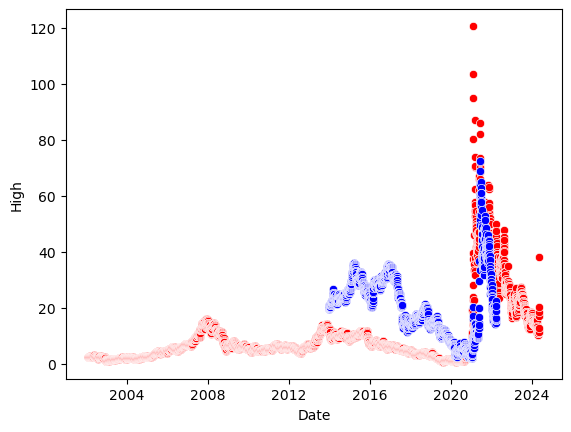

In [37]:
sns.scatterplot(data=df, x=df['Date'], y=df['High'],color='red' )
sns.scatterplot(data=df2, x=df2['Date'], y=df2['High'],color='blue' )

In [38]:
df2

,Date,Open,High,Low,Close,Volume
0,2013-12-18,19.180000,19.790001,18.900000,18.900000,5457200
1,2013-12-19,18.900000,19.490000,18.809999,19.490000,1605400
2,2013-12-20,19.650000,19.770000,19.400000,19.680000,737100
3,2013-12-23,19.790001,19.990000,19.500000,19.740000,698100
4,2013-12-24,19.740000,19.820000,19.500000,19.530001,213700
...,...,...,...,...,...,...
2076,2022-03-18,14.980000,15.900000,14.970000,15.800000,31890700
2077,2022-03-21,15.690000,16.549999,15.280000,15.860000,34256700
2078,2022-03-22,15.880000,18.910000,15.750000,18.260000,81798900
2079,2022-03-23,18.750000,22.350000,18.180000,20.740000,170142600


In [40]:
wsb

,label,timestamp,score,comms_num
0,AMC,2021-01-28,38408,6027
1,AMC,2021-01-29,22404,7023
2,AMC,2021-01-30,66084,11660
3,AMC,2021-01-31,54180,6934
4,AMC,2021-02-01,122882,8710
...,...,...,...,...
495,Other,2021-08-12,47788,35914
496,Other,2021-08-13,49426,44466
497,Other,2021-08-14,44579,5690
498,Other,2021-08-15,24634,13030


MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [43]:
wsb.rename(columns={'timestamp':'Date'},inplace=True)

In [44]:
amc_wsb= wsb[wsb["label"]=="AMC"]
amc_wsb["label"].unique()

array(['AMC'], dtype=object)

In [48]:
amcbets= pd.merge(df2,amc_wsb, how="inner", on="Date")

In [49]:
gme_wsb= wsb[wsb["label"]=="GME"]
gme_wsb["label"].unique()

array(['GME'], dtype=object)

In [50]:
gmebets= pd.merge(df,gme_wsb, how="inner", on="Date")

In [51]:
gmebets


,Date,Open,High,Low,Close,Adj Close,Volume,label,score,comms_num
0,2021-01-28,66.250000,120.750000,28.062500,48.400002,48.400002,235263200,GME,268078,26332
1,2021-01-29,94.927498,103.495003,62.500000,81.250000,81.250000,202264400,GME,1285976,277238
2,2021-02-01,79.139999,80.500000,53.000000,56.250000,56.250000,149528800,GME,1125454,165514
3,2021-02-02,35.189999,39.500000,18.555000,22.500000,22.500000,312732400,GME,489902,82138
4,2021-02-03,28.002501,28.350000,21.312500,23.102501,23.102501,170794000,GME,768288,189625
...,...,...,...,...,...,...,...,...,...,...
105,2021-08-06,38.647499,39.125000,37.577499,37.942501,37.942501,5410800,GME,0,32
106,2021-08-09,37.950001,41.177502,37.665001,40.282501,40.282501,8996800,GME,23770,1541
107,2021-08-11,39.607498,39.762501,38.654999,39.695000,39.695000,3781600,GME,108,179
108,2021-08-12,39.970001,41.070000,39.332500,40.587502,40.587502,5271200,GME,766,176


In [52]:
amcbets

,Date,Open,High,Low,Close,Adj Close,Volume,label,score,comms_num
0,2021-01-28,11.980000,16.500000,6.510000,8.630000,8.630000,591223900,AMC,38408,6027
1,2021-01-29,14.310000,16.000000,11.600000,13.260000,13.260000,602193300,AMC,22404,7023
2,2021-02-01,17.000000,17.250000,12.910000,13.300000,13.300000,434608000,AMC,122882,8710
3,2021-02-02,9.480000,10.100000,6.000000,7.820000,7.820000,462775900,AMC,16928,3338
4,2021-02-03,8.850000,9.770000,7.890000,8.970000,8.970000,221405100,AMC,97207,7629
...,...,...,...,...,...,...,...,...,...,...
105,2021-08-06,33.419998,33.580002,31.570000,32.700001,32.700001,52858800,AMC,1000,2285
106,2021-08-09,32.680000,35.380001,32.349998,33.799999,33.799999,81054600,AMC,3016,270
107,2021-08-10,36.900002,37.160000,31.440001,31.750000,31.750000,116181500,AMC,1337,4328
108,2021-08-11,31.580000,31.910000,29.400000,31.549999,31.549999,69684300,AMC,532,3268
